<a href="https://colab.research.google.com/github/mayakhesin/expiring-mab/blob/master/Piki_leaderboard_8_shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

lb = pd.read_csv('/content/gdrive/My Drive/Piki/raw_data_top_shows_2.csv')
lb

,discover_date,user_id,action,song_id,artist_id,show_date,artist,cnt
0,2019-06-18,3720961,song_next,36763,2613,2019-09-24,Bastille,1
1,2019-06-18,3720647,song_next,7355,2613,2019-09-24,Bastille,1
2,2019-06-18,3721054,song_next,7355,2613,2019-09-24,Bastille,1
3,2019-06-18,3721062,song_next,7355,2613,2019-09-24,Bastille,1
4,2019-06-20,3721221,song_next,7355,2613,2019-09-24,Bastille,1
5,2019-06-21,3720277,song_next,7355,2613,2019-09-24,Bastille,1
6,2019-07-15,3722355,song_add,792,3238,2019-12-01,Beirut,1
7,2019-07-16,3722355,song_add,4109,1507,2019-10-12,Explosions in the Sky,2
8,2019-07-16,3721424,song_next,7355,2613,2019-09-24,Bastille,1
9,2019-07-16,3722355,song_add,7115,267,2019-09-17,Andrew Bird,2


In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

lb = pd.read_csv('/content/gdrive/My Drive/Piki/leaderboard2.csv')
lb['success_count'] = (lb['liked']*lb['cnt']).round().astype(int)
lb['failure_count'] = (lb['cnt'] - lb['success_count']).round().astype(int)
probability = (lb['success_count']+1)/(lb['success_count']+lb['failure_count']+2)
lb['probability'] = probability 
lb.head()

,date,artist,tag,liked,cnt,venue,price,"datediff(date,now())",success_count,failure_count,probability
0,2019-07-25 18:00:00,Phosphorescent,folk,0.6479,71,99 Scott Ave.,35.0,0,46,25,0.643836
1,2019-07-25 18:00:00,Tomasa Del Real,reggaeton,0.5714,7,Elsewhere,15.0,0,4,3,0.555556
2,2019-07-25 18:30:00,The O'My's,hip hop,0.5000,16,Baby's All Right,15.0,0,8,8,0.500000
3,2019-07-25 19:30:00,Ryley Walker,folk,0.5506,89,WFMU Monty Hall,15.0,0,49,40,0.549451
4,2019-07-25 19:30:00,Great Grandpa,indie,0.5000,6,Bowery Ballroom,29.0,0,3,3,0.500000


Bandit class (found online)

In [0]:
# class for our row of bandits
class MAB:
  def __init__(self, bandit_probs):
    self.bandit_probs = bandit_probs
        
  # function that draws from the bandits
  def draw(self, k):
    # we return the reward and the regret of the action
    return (np.random.binomial(1, self.bandit_probs[k]),    # reward
            np.max(self.bandit_probs) - self.bandit_probs[k])  # regret

# e-greedy policy
class eGreedyPolicy:
  def __init__(self, epsilon):
    self.epsilon = epsilon
        
  # choice of bandit
  def choose_bandit(self, k_array, reward_array, n_bandits):
    success_count = reward_array.sum(axis=1) + np.array(lb['success_count'])
    total_count = k_array.sum(axis=1) + np.array(lb['cnt'])
    # set to -1 to avoid problems in success_ratio computation
    total_count[total_count == 0] = -1
    success_ratio = success_count/total_count       
    # choosing best greedy action or random depending with epsilon probability
    if np.random.random() < self.epsilon:
      # returning random action, excluding best
      return np.random.choice(np.delete(list(range(N_BANDITS)), np.argmax(success_ratio)))
    else:
      # returning best greedy action
      return np.argmax(success_ratio)

# UCB policy
class UCBPolicy:
  def __init__(self):
    pass
    
  # choice of bandit
  def choose_bandit(self, k_array, reward_array, n_bandits):
    # sucesses and total draws
    success_count = reward_array.sum(axis=1) + np.array(lb['success_count'])
    total_count = k_array.sum(axis=1) + np.array(lb['cnt'])
    sum_total_count = np.sum(total_count)
    if sum_total_count == 0:
      return 0
    total_count[total_count == 0] = -1
    success_ratio = success_count/total_count
    # computing confidence interval
    sqrt_term = np.full(len(total_count), np.inf)
    sqrt_term[total_count != -1] = np.sqrt(2*np.log(sum_total_count)/total_count[total_count != -1])
    # returning best greedy action
    return np.argmax(success_ratio + sqrt_term)
      
# Thompson sampling policy
class TSPolicy:
  def __init__(self):
    pass
      
  # choice of bandit
  def choose_bandit(self, k_array, reward_array, n_bandits):
    # list of samples, for each bandit
    samples_list = []
    success_count = reward_array.sum(axis=1)
    failure_count = k_array.sum(axis=1) - success_count
    success_count += np.array(lb['success_count'])
    failure_count += np.array(lb['failure_count'])
    # drawing a sample from each bandit distribution
    samples_list = [np.random.beta(1 + success_count[bandit_id], 1 + failure_count[bandit_id]) for bandit_id in range(n_bandits)]
    # returning bandit with best sample
    return np.argmax(samples_list)

def simulate(policy):
  # numpy arrays for accumulating draws, bandit choices and rewards, more efficient calculations
  k_array = np.zeros((N_BANDITS,N_DRAWS))
  reward_array = np.zeros((N_BANDITS,N_DRAWS))
  regret_array = np.zeros((N_BANDITS,N_DRAWS))
  # lists for ease of use, visualization
  k_list = []
  reward_list = []
  regret_list = []
  # loop generating draws
  for draw_number in range(N_DRAWS):
    # choosing arm and drawing
    k = policy.choose_bandit(k_array, reward_array, N_BANDITS)
    reward, regret = mab.draw(k)
    # record information about this draw
    k_list.append(k)
    reward_list.append(reward)
    k_array[k, draw_number] = 1
    reward_array[k, draw_number] = reward
    regret_array[k, draw_number] = regret
  return reward_array, regret_array, k_list

mab = MAB(lb['probability'])
# number of draws
N_DRAWS = 10000
# number of bandits
N_BANDITS = len(mab.bandit_probs)

ts = simulate(TSPolicy())
ucb = simulate(UCBPolicy())
eg = simulate(eGreedyPolicy(0.3))

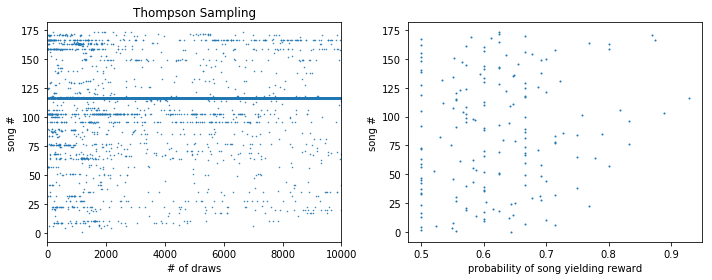

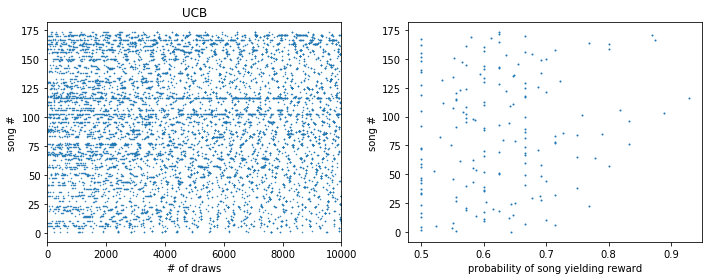

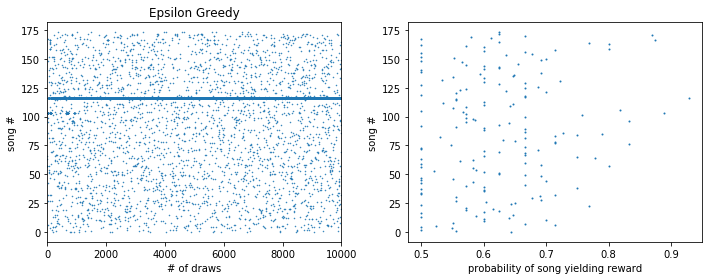

In [0]:
def create_plot(data, label):
  fig, ax = plt.subplots(1, 2)
  fig.set_size_inches(10, 4)
  reward_array, regret_array, k_list = data
  k_list_df = pd.DataFrame(k_list)
  k_list_df.plot(style='.', label=label, ax=ax[0], markersize=1)
  ax[0].set_title(label)
  ax[0].get_legend().remove()
  ax[0].set_ylabel("song #")
  ax[0].set_xlabel("# of draws")
  def plot_series_transposed(s, ax):
    ax.plot(s.to_numpy(), s.index.values, 'o', markersize=1)
  plot_series_transposed(lb['probability'], ax[1])
  ax[1].set_xlabel("probability of song yielding reward")
  ax[1].set_ylabel("song #")
  plt.tight_layout()
  plt.show()

create_plot(ts, 'Thompson Sampling')
create_plot(ucb, 'UCB')
create_plot(eg, 'Epsilon Greedy')

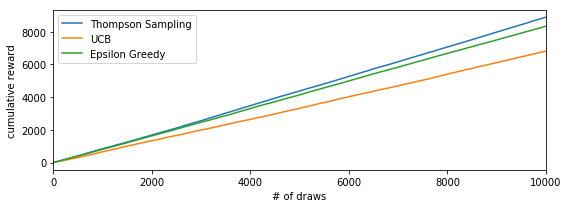

In [0]:
def create_plot(data, label, ax):
  reward_array, regret_array, k_list = data
  reward_df = pd.DataFrame(reward_array)
  reward_cumulative = reward_df.cumsum(axis=1).sum(axis=0)
  reward_cumulative.plot(kind='line', label=label, ax=ax)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 3)
create_plot(ts, 'Thompson Sampling', ax)
create_plot(ucb, 'UCB', ax)
create_plot(eg, 'Epsilon Greedy', ax)
ax.legend(loc='best')
# ax.set_yscale("log")
ax.set_ylabel("cumulative reward")
ax.set_xlabel("# of draws")
  
plt.tight_layout()
plt.show()